#Imports

In [1]:
from sklearn.preprocessing import StandardScaler#import scaler for normalisation
from sklearn.datasets import load_iris #getting the data
from sklearn.model_selection import train_test_split #split data
from sklearn.neighbors import KNeighborsClassifier #import knn
from sklearn.metrics import accuracy_score #import accuracy score
from sklearn.model_selection import GridSearchCV #import grid search for knn
from sklearn.datasets import fetch_openml


#Load data

In [2]:
# Load the dataset ( MNIST but smaller)
mnist=fetch_openml('mnist_784')
x = mnist.data
y = mnist.target


In [ ]:
print(mnist.data.shape) #structure data
print(mnist.target.shape) #structure target

(70000, 784)
(70000,)


#sampling(keeping only 5000 sample)

In [ ]:
data=mnist.data.sample(5000) #echantillage 5000 data only
target=mnist.target.iloc[list(data.index)] #taking targets of the 5000 data we kept


#splitting data for train & test


In [ ]:
from sklearn.model_selection import train_test_split #import split
x_train,x_test,y_train,y_test=train_test_split(data,target,test_size=0.8) #split data

#creating model using knn  and testing it on diffrent neighbors

In [ ]:
knn=KNeighborsClassifier(n_neighbors=1) #create model
knn.fit(x_train,y_train) #fit data
predict=knn.predict(x_test) #call function

error=1-accuracy_score(y_test,predict) #add error to list
print("error:",error)

error: 0.10650000000000004


In [ ]:
import numpy as np
error=[] #list foe erroes
for k in range (1,16):
  print("for k=",k)
  knn=KNeighborsClassifier(n_neighbors=k) #create model

  knn.fit(x_train,y_train)

  err=knn.predict(x_test) #call function

  error.append(1-accuracy_score(y_test,err)) #add error to list
  print("error:",error[k-1])
  print("\n")

for k= 1
error: 0.10650000000000004


for k= 2
error: 0.12524999999999997


for k= 3
error: 0.11475000000000002


for k= 4
error: 0.11224999999999996


for k= 5
error: 0.11450000000000005


for k= 6
error: 0.11650000000000005


for k= 7
error: 0.12024999999999997


for k= 8
error: 0.125


for k= 9
error: 0.126


for k= 10
error: 0.12675000000000003


for k= 11
error: 0.12924999999999998


for k= 12
error: 0.13124999999999998


for k= 13
error: 0.13524999999999998


for k= 14
error: 0.13724999999999998


for k= 15
error: 0.14100000000000001




In [ ]:
print(error)

[0.10650000000000004, 0.12524999999999997, 0.11475000000000002, 0.11224999999999996, 0.11450000000000005, 0.11650000000000005, 0.12024999999999997, 0.125, 0.126, 0.12675000000000003, 0.12924999999999998, 0.13124999999999998, 0.13524999999999998, 0.13724999999999998, 0.14100000000000001]


#plotting errors graph

Text(0.5, 1.0, 'error vs k')

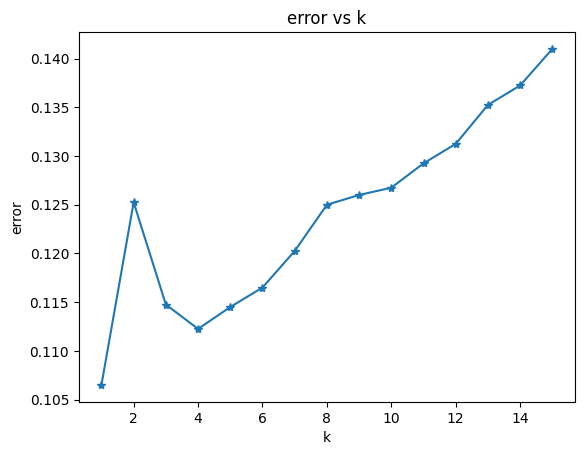

In [ ]:
plt.plot(range(1,16),error,marker="*") #plot error vs k
plt.xlabel("k")
plt.ylabel("error")
plt.title("error vs k")

#finding best k for knn

In [ ]:
best_k=np.argmin(error)+1 #find best k
print("best k:",best_k)

best k: 1


#creating model with best neighbors number

In [ ]:
best_knn=KNeighborsClassifier(n_neighbors=best_k) #create model
best_knn.fit(x_train,y_train) #fit data

y_pred_best=best_knn.predict(x_test) #call function

error_best=1-accuracy_score(y_test,y_pred_best) #add error to list
print("error with best k:",error_best)

error with best k: 0.10650000000000004


#prediction


In [ ]:
predicted=y_pred_best

In [ ]:
images=x_test.values.reshape((-1,28,28)) #reshape data
select=np.random.randint(images.shape[0],size=12) #select 12 random images

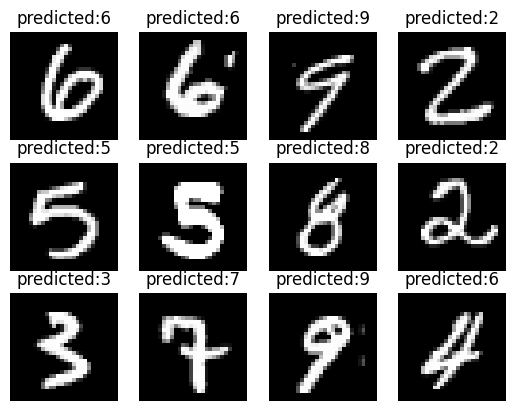

In [ ]:
fig,ax=plt.subplots(3,4)
for i,v in enumerate(select):
  plt.subplot(3,4,i+1)
  plt.imshow(images[v],cmap="gray", interpolation="nearest")
  plt.axis("off")
  plt.title(f'predicted:{predicted[v]}')
plt.show()

#recreating model with best k for larger data samples & testing it

In [ ]:
for sample in[10000,20000,40000]:
  larger_data=mnist.data.sample(sample)
  larger_target=mnist.target.iloc[list(larger_data.index)]
  x_train,x_test,y_train,y_test=train_test_split(larger_data,larger_target,test_size=0.8)
  best_knn=KNeighborsClassifier(n_neighbors=best_k)
  best_knn.fit(x_train,y_train)
  y_pred_best=best_knn.predict(x_test)
  error_b=1-accuracy_score(y_test,y_pred_best)
  print("error with best k:",error_b)


error with best k: 0.08450000000000002
error with best k: 0.07187500000000002
error with best k: 0.05343750000000003


In [ ]:
e=[]
for k in range(1,16):
  print("for k=",k)
  knn=KNeighborsClassifier(n_neighbors=k) #create model

  knn.fit(x_train,y_train)

  err=knn.predict(x_test) #call function

  e.append(1-accuracy_score(y_test,err)) #add error to list
  print("error:",e[k-1])
  print("\n")

for k= 1
error: 0.05343750000000003


for k= 2
error: 0.06628124999999996


for k= 3
error: 0.055781250000000004


for k= 4
error: 0.05812499999999998


for k= 5
error: 0.05712499999999998


for k= 6
error: 0.06006250000000002


for k= 7
error: 0.06059375


for k= 8
error: 0.06187500000000001


for k= 9
error: 0.06218749999999995


for k= 10
error: 0.06356249999999997


for k= 11
error: 0.06478125000000001


for k= 12
error: 0.06646874999999997


for k= 13
error: 0.06828124999999996


for k= 14
error: 0.06828124999999996


for k= 15
error: 0.07037499999999997




Text(0.5, 1.0, 'error vs k')

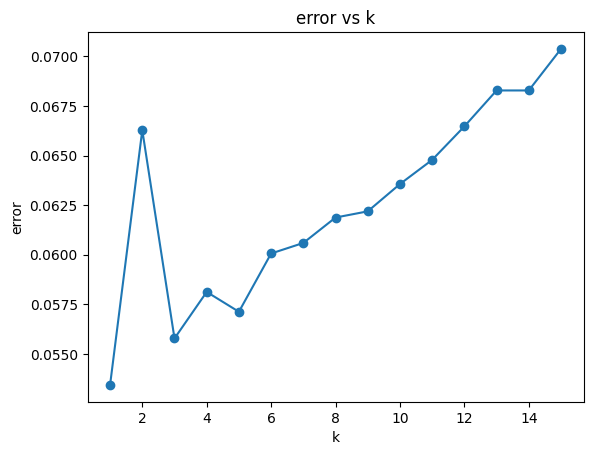

In [ ]:
plt.plot(range(1,16),e,marker="o") #plot error vs k
plt.xlabel("k")
plt.ylabel("error")
plt.title("error vs k")

In [ ]:
print(x.shape[0])
print(y.shape[0])

70000
70000


In [ ]:
b_k=np.argmin(e)+1
print("best k is: ",b_k)

best k is:  1


In [ ]:
b_knn=KNeighborsClassifier(n_neighbors=b_k) #create model
b_knn.fit(x_train,y_train) #fit data

y_pred_b=b_knn.predict(x_test) #call function

error_b=1-accuracy_score(y_test,y_pred_best) #add error to list
print("error with best k:",error_b)

error with best k: 0.05343750000000003


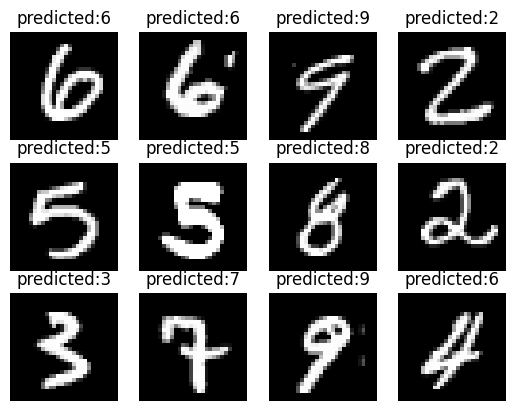

In [ ]:
img=x_test.values.reshape((-1,28,28)) #reshape data
select2=np.random.randint(img.shape[0],size=12) #select 12 random images
fig,ax=plt.subplots(3,4)
for i,v in enumerate(select):
  plt.subplot(3,4,i+1)
  plt.imshow(images[v],cmap="gray", interpolation="nearest")
  plt.axis("off")
  plt.title(f'predicted:{predicted[v]}')
plt.show()